In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
#import sns
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

Read the data and save it in a data frame type.

In [42]:
df = pd.read_csv('MatchHomeTeamInfo.csv')
df1=pd.read_csv('MatchAwayTeamInfo.csv')

Remove missing values from data using forward fill strategy.

In [43]:
#df.dropna(inplace=True)
#df.fillna(method='ffill', inplace=True)
df

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12260075,Nadal R.,nadal-rafael,M,183436,"Manacor, Mallorca, Spain","Manacor, Mallorca, Spain",1.85,85.0,left-handed,2001.0,138859.0,112340134.0,14486,276.0,NAD,Spain,"Nadal, Rafael"
1,12260076,Sinner J.,sinner-jannik,M,99188,"Monte Carlo, Monaco","San Candido, Italy",1.88,68.0,right-handed,2018.0,3692708.0,17916067.0,206570,2.0,SIN,Italy,"Sinner, Jannik"
2,12260077,Struff J.,struff-jan-lennard,M,8295,"Warstein, Germany","Warstein, Germany",1.93,92.0,right-handed,2009.0,524212.0,8477803.0,46391,39.0,STR,Germany,"Struff, Jan-Lennard"
3,12260078,Rublev A.,rublev-andrey,M,38304,"Moscow, Russia","Moscow, Russia",1.88,70.0,right-handed,2014.0,1673795.0,19663800.0,106755,6.0,RUB,Russia,"Rublev, Andrey"
4,12260080,Cerundolo F.,cerundolo-francisco,M,10628,"Argentina, Buenos Aires","Buenos Aires, Argentina",1.85,78.0,right-handed,NaN,583759.0,3845888.0,221012,23.0,CER,Argentina,"Cerundolo, Francisco"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14631,12384892,Chazal M.,chazal-maxime,M,448,"Nouméa, New Caledonia",Nouméa,1.75,71.0,right-handed,2010.0,7695.0,167038.0,17065,561.0,CHA,France,"Chazal, Maxime"
14632,12384975,Bandecchi S.,bandecchi-susan,F,613,NaN,NaN,NaN,NaN,right-handed,NaN,6773.0,265306.0,96061,344.0,BAN,Switzerland,"Bandecchi, Susan"
14633,12385017,Ortenzi J.,ortenzi-jazmin,F,463,NaN,NaN,NaN,NaN,NaN,NaN,8586.0,51038.0,254281,527.0,ORT,Argentina,"Ortenzi, Jazmin"
14634,12385869,Masabayashi T.,masabayashi-tomohiro,M,102,NaN,HYOGO,1.70,NaN,NaN,NaN,463.0,16051.0,154486,1149.0,MAS,Japan,"Masabayashi, Tomohiro"


In [44]:
#df1.dropna(inplace=True)
df1

,match_id,name,slug,gender,user_count,residence,birthplace,height,weight,plays,turned_pro,current_prize,total_prize,player_id,current_rank,name_code,country,full_name
0,12260075,Lehečka J.,lehecka-jiri,M,6858,"Knezmost, Czech Republic","Mlada Boleslav, Czechia",1.85,80.0,right-handed,NaN,763346.0,2988783.0,254742,24.0,LEH,Czech Republic,"Lehečka, Jiří"
1,12260076,Khachanov K.,khachanov-karen,M,14411,"Dubai, UAE","Moscow, Russia",1.98,87.0,right-handed,2013.0,877460.0,13580818.0,90080,18.0,KHA,Russia,"Khachanov, Karen"
2,12260077,Alcaraz C.,alcaraz-carlos,M,141553,"El Palmar, Murcia, Spain","El Palmar, Murcia, Spain",1.83,68.0,right-handed,2018.0,1590518.0,24112308.0,275923,3.0,ALC,Spain,"Alcaraz, Carlos"
3,12260078,Alcaraz C.,alcaraz-carlos,M,141553,"El Palmar, Murcia, Spain","El Palmar, Murcia, Spain",1.83,68.0,right-handed,2018.0,1590518.0,24112308.0,275923,3.0,ALC,Spain,"Alcaraz, Carlos"
4,12260080,Zverev A.,zverev-alexander,M,60430,"Monte Carlo, Monaco","Hamburg, Germany",1.98,90.0,right-handed,2013.0,2676831.0,34897595.0,57163,4.0,ZVE,Germany,"Zverev, Alexander"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13407,12384975,Șerban R.,serban-raluca-georgiana,F,832,NaN,NaN,NaN,NaN,right-handed,NaN,43717.0,340468.0,103375,200.0,SER,Cyprus,"Serban, Raluca Georgiana"
13408,12385017,Pedretti T.,pedretti-thaisa-grana,F,453,NaN,NaN,NaN,NaN,NaN,NaN,2598.0,70165.0,120664,647.0,PED,Brazil,"Pedretti, Thaisa Grana"
13409,12385869,Fukuda S.,fukuda-sora,M,139,"Bradenton, FL",Japan,1.80,72.0,left-handed,NaN,1278.0,52832.0,103913,611.0,FUK,Japan,"Fukuda, Sora"
13410,12385873,Uchida K.,uchida-kaichi,M,760,NaN,NaN,1.80,NaN,right-handed,2013.0,10488.0,444064.0,82579,483.0,UCH,Japan,"Uchida, Kaichi"


1- Get the number of players from the MatchHomeTeamInfo(df) and MatchAwayTeamInfo(df1).

In [45]:
all_player_ids = pd.concat([df['player_id'], df1['player_id']])
num_players = len(all_player_ids.unique())
print("Total number of players:",num_players)


Total number of players: 2352


2. What is the average height of the players?

In [7]:
match_away_team_df=pd.read_csv('MatchAwayTeamInfo.csv')
match_home_team_df=pd.read_csv('MatchHomeTeamInfo.csv')
height_player_mean=pd.concat([match_away_team_df.height,match_home_team_df.height]).mean()
height_player_mean

1.8193923530581142

According to the given information, the average height of the players in this series of matches is 1.82

3. Which player has the highest number of wins?

In [46]:
dfEvent = pd.read_csv('MatchEventInfo.csv')
dfEvent.dropna(inplace=True)
dfWinner=dfEvent[['match_id','winner_code']]
dfWinner


,match_id,winner_code
1,12260076,1.0
2,12260077,2.0
3,12260078,1.0
4,12260080,1.0
5,12260081,1.0
...,...,...
20278,12346486,2.0
20288,12360758,1.0
20289,12360760,2.0
20295,12361503,1.0


In [131]:
merged_df = pd.merge(df, df1, on='match_id',how='inner', suffixes=('_player1', '_player2'))
merged_df=merged_df[['match_id','name_player1', 'name_player2']]

merged_df

,match_id,name_player1,name_player2
0,12260075,Nadal R.,Lehečka J.
1,12260076,Sinner J.,Khachanov K.
2,12260077,Struff J.,Alcaraz C.
3,12260078,Rublev A.,Alcaraz C.
4,12260078,Rublev A.,Alcaraz C.
...,...,...,...
26677,12384892,Chazal M.,Gomez F.
26678,12384975,Bandecchi S.,Șerban R.
26679,12385017,Ortenzi J.,Pedretti T.
26680,12385869,Masabayashi T.,Fukuda S.


In [54]:
playerWinner = pd.merge(merged_df, dfWinner, on='match_id', how='inner')
playerWinner['winner_name'] = playerWinner.apply(lambda row: row['name_player1'] if row['winner_code'] == 1.0 else row['name_player2'], axis=1)

# Determine which player wins the most matches
winner_counts = playerWinner['winner_name'].value_counts()
print("The player who wins the most matches is:", winner_counts.idxmax())


,match_id,name_player1,name_player2,winner_code,winner_name
0,12260076,Sinner J.,Khachanov K.,1.0,Sinner J.
1,12260077,Struff J.,Alcaraz C.,2.0,Alcaraz C.
2,12260078,Rublev A.,Alcaraz C.,1.0,Rublev A.
3,12260078,Rublev A.,Alcaraz C.,1.0,Rublev A.
4,12260078,Rublev A.,Alcaraz C.,1.0,Rublev A.
...,...,...,...,...,...
7876,12346462,Paquet C.,Vondroušová M.,2.0,Vondroušová M.
7877,12346464,Fernandez L.,Jabeur O.,2.0,Jabeur O.
7878,12346470,Mertens E.,Rybakina E.,2.0,Rybakina E.
7879,12360760,Galarneau A.,Krueger M.,2.0,Krueger M.


4. What is the longest match recorded in terms of duration?

In [132]:
match_time_df=pd.read_csv('MatchTimeInfo.csv')
match_time_df.head()
match_time_df.fillna(0,inplace=True)
match_time_df.drop_duplicates(inplace=True)

In [133]:

match_time_df['sumation_time_periods_match']=match_time_df.iloc[:,[1,2,3,4,5]].sum(axis=1)
match_time_df.head()

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
0,12260075,3463.0,3855.0,0.0,0.0,0.0,1.714511e+09,7318.0
1,12260076,3032.0,2121.0,2674.0,0.0,0.0,1.714492e+09,7827.0
2,12260077,2747.0,3525.0,4074.0,0.0,0.0,1.714492e+09,10346.0
3,12260078,2519.0,2531.0,2121.0,0.0,0.0,1.714578e+09,7171.0
4,12260080,2616.0,2766.0,0.0,0.0,0.0,1.714483e+09,5382.0


In [134]:
longest_time=match_time_df['sumation_time_periods_match'].max()
longest_match=match_time_df.loc[(match_time_df['sumation_time_periods_match']==longest_time),:]
longest_match

,match_id,period_1,period_2,period_3,period_4,period_5,current_period_start_timestamp,sumation_time_periods_match
13350,12346747,167761.0,3392.0,0.0,0.0,0.0,1.716382e+09,171153.0


According to the given information ,the longest match recorded in terms of duration is the match with match-id:12346747 with 171153ps or 16h

5. How many sets are typically played in a tennis match?

In [53]:
dfPower = pd.read_csv('PowerInfo.csv')
dfPower.head()
num_sets_per_match = dfPower.groupby('match_id')['set_num'].nunique()
print(num_sets_per_match)

match_id
12260075    2
12260076    3
12260077    3
12260078    3
12260080    2
           ..
12384789    2
12384806    3
12384892    2
12384975    3
12385017    3
Name: set_num, Length: 6658, dtype: int64


6. Which country has produced the most successful tennis players?

In [ ]:
merged_df = pd.merge(df, df1, on='match_id',how='inner', suffixes=('_player1', '_player2'))
merged_df1=merged_df[['match_id','name_player1', 'name_player2','country_player1','country_player2']]
playerWinner = pd.merge(merged_df1, dfWinner, on='match_id', how='inner')
playerWinner['winner_name'] = playerWinner.apply(lambda row: row['name_player1'] if row['winner_code'] == 1.0 else row['name_player2'], axis=1)
playerWinner['winner_country'] = playerWinner.apply(lambda row: row['country_player1'] if row['winner_code'] == 1.0 else row['country_player2'], axis=1)
winner_country = playerWinner['winner_country'].value_counts()
print("The player who wins the most matches is:", winner_country.idxmax())



The player who wins the most matches is: France


,match_id,name_player1,name_player2,country_player1,country_player2,winner_code,winner_name,winner_country
0,12260076,Sinner J.,Khachanov K.,Italy,Russia,1.0,Sinner J.,Italy
1,12260077,Struff J.,Alcaraz C.,Germany,Spain,2.0,Alcaraz C.,Spain
2,12260078,Rublev A.,Alcaraz C.,Russia,Spain,1.0,Rublev A.,Russia
3,12260078,Rublev A.,Alcaraz C.,Russia,Spain,1.0,Rublev A.,Russia
4,12260078,Rublev A.,Alcaraz C.,Russia,Spain,1.0,Rublev A.,Russia
...,...,...,...,...,...,...,...,...
7876,12346462,Paquet C.,Vondroušová M.,France,Czech Republic,2.0,Vondroušová M.,Czech Republic
7877,12346464,Fernandez L.,Jabeur O.,Canada,Tunisia,2.0,Jabeur O.,Tunisia
7878,12346470,Mertens E.,Rybakina E.,Belgium,Kazakhstan,2.0,Rybakina E.,Kazakhstan
7879,12360760,Galarneau A.,Krueger M.,Canada,USA,2.0,Krueger M.,USA


7. What is the average number of aces per match?

In [58]:
df_period=pd.read_csv('PeriodInfo.csv')
aces_stats = df_period[df_period['statistic_name'] == 'aces']
total_aces = aces_stats['home_value'].sum() + aces_stats['away_value'].sum()

# Count the number of matches
num_matches = dfEvent['match_id'].nunique()

# Calculate the average number of aces per match
average_aces_per_match = total_aces / num_matches

print(f"The average number of aces per match is {average_aces_per_match:.2f}.")

The average number of aces per match is 102.69.


8. Is there a difference in the number of double faults based on gender?

<Figure size 800x600 with 0 Axes>

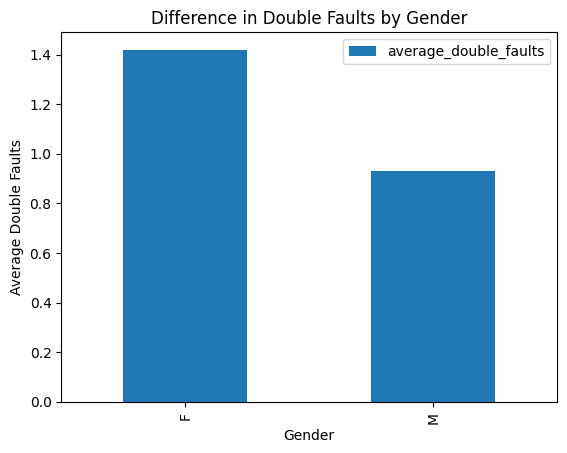

In [67]:
df_players = pd.concat([df, df1])
df_period=pd.read_csv('PeriodInfo.csv')
df_period.fillna(0)
# Join the df_players and df_period DataFrames on 'match_id'
df_combined = pd.merge(df_players, df_period, on='match_id')
# Filter the combined DataFrame to get the 'double_faults' statistic
double_faults_stats = df_combined[df_combined['statistic_name'] == 'double_faults']
# Calculate the average double faults for each gender
gender_double_faults = double_faults_stats.groupby('gender')[['home_value', 'away_value']].mean().reset_index()
gender_double_faults['average_double_faults'] = (gender_double_faults['home_value'] + gender_double_faults['away_value']) / 2

#plot the results
plt.figure(figsize=(8, 6))
gender_double_faults.plot(kind='bar', x='gender', y='average_double_faults')

plt.xlabel('Gender')
plt.ylabel('Average Double Faults')
plt.title('Difference in Double Faults by Gender')
plt.show()

In conclusion of the given information, there is a difference between male and female in the number of double faults. The average double faults value is more in females than in males.

9. Which player has won the most tournaments in a single month?
We use the playerWinner dataframe previousely produced in question 3. It contains 'match_id', 'name_player1', 'name_player2' and 'winner_name' fields. Now we join this dataframe with the MatchTournamentInfo dataframe to get the player that won the most tournaments.

In [ ]:
dfTournament=pd.read_csv('MatchTournamentInfo.csv')

playerWinnerTourn = pd.merge(playerWinner, dfTournament, on='match_id', how='inner')
playerWinnerTourn=playerWinnerTourn[['match_id','name_player1','name_player2','tournament_id','winner_name']]
playerWinnerTourn

# Count the number of wins for each player
player_wins = playerWinnerTourn.groupby('winner_name').size().reset_index(name='wins')

# Sort the results by the number of wins in descending order
player_wins = player_wins.sort_values(by='wins', ascending=False)

# Print the player who wins the most tournaments
print("The player who wins the most tournaments is:", player_wins.iloc[0]['winner_name'])

The player who wins the most tournaments is: Bergs Z.


10. Is there a correlation between a player's height and their ranking?

The correlation between height and ranking is:  0.10782530868262803


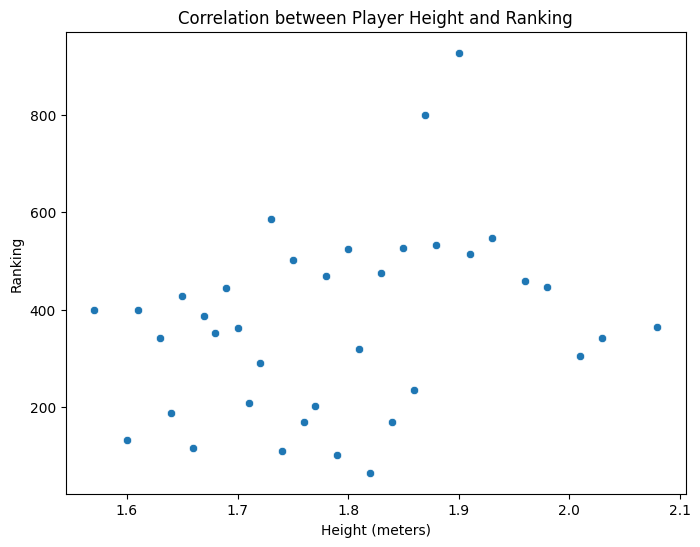

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine the player information from both home and away teams
df_players = pd.concat([df, df1])
height_rank_correlation=df_players['height'].corr(df_players['current_rank'])
print("The correlation between height and ranking is: ", height_rank_correlation)
# Calculate the average ranking for each height
height_ranking_correlation = df_players.groupby('height')['current_rank'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='current_rank', data=height_ranking_correlation)

plt.xlabel('Height (meters)')
plt.ylabel('Ranking')
plt.title('Correlation between Player Height and Ranking')
plt.show()

According to the scatter plot and height_rank_correlation value, it cannot be claimed that there is a correlation between players height and their rank.

11. What is the average duration of matches?

In [72]:
df_time=pd.read_csv('MatchTimeInfo.csv')
df_time.fillna(0,inplace=True)
total_duration = df_time['period_1'].sum() + df_time['period_2'].sum() + df_time['period_3'].sum()
num_matches = df_time['match_id'].nunique()

average_duration = total_duration / num_matches

print(f"The average duration of matches is {average_duration / 60:.2f} minutes.")

The average duration of matches is 182.77 minutes.


12. What is the average number of games per set in men's matches compared to women's matches?

In [87]:
power_info_df=pd.read_csv('PowerInfo.csv')

df_combined = pd.merge(power_info_df, df_players, on='match_id')

total_games_per_set = df_combined.groupby(['match_id', 'set_num', 'gender'])['game_num'].max()

# Calculate the average games per set for each gender
gender_games_per_set = total_games_per_set.groupby('gender').mean()

print(f"The average number of games per set in men's matches is {gender_games_per_set['M']:.2f}.")
print(f"The average number of games per set in women's matches is {gender_games_per_set['F']:.2f}.")

The average number of games per set in men's matches is 9.18.
The average number of games per set in women's matches is 8.92.


On average, in men's matches, each set has 18 games and in women's matches, each set has 17 games

13. What is the distribution of left-handed versus right-handed players?

The distribution of right-handed players versus left-handed: right-handed    23630
left-handed      3186
ambidextrous        8
Name: plays, dtype: int64
The distribution of right-handed players versus left-handed: right-handed    88.092753
left-handed     11.877423
ambidextrous     0.029824
Name: plays, dtype: float64


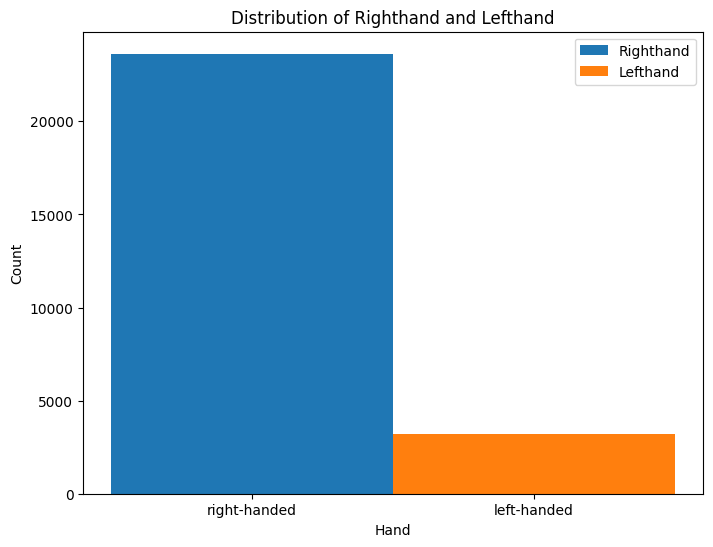

In [13]:
import matplotlib.pyplot as plt

df = df.loc[df['plays'].notnull()]

df1 = df.loc[df['plays'].notnull()]

#concat two tables home and away teams
combined_df = pd.concat([df, df1])
distribution = combined_df['plays'].value_counts()

print("The distribution of right-handed players versus left-handed:",distribution)

percentage_distribution = (distribution / len(combined_df)) * 100
print("The distribution of right-handed players versus left-handed:",percentage_distribution)
# Draw a histogram to view the distribution
righthand_data = combined_df.loc[df['plays'] == 'right-handed']
lefthand_data = combined_df.loc[df['plays'] == 'left-handed']

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist(righthand_data['plays'], bins=1, label='Righthand')
ax.hist(lefthand_data['plays'], bins=1, label='Lefthand')

# Set labels and title
ax.set_xlabel('Hand')
ax.set_ylabel('Count')
ax.set_title('Distribution of Righthand and Lefthand')

# Add legend
ax.legend()

# Show the plot
plt.show()


14. What is the most common type of surface used in tournaments?

Red clay             14238
Hardcourt outdoor     4606
Hardcourt indoor       241
Synthetic outdoor       93
Name: ground_type, dtype: int64


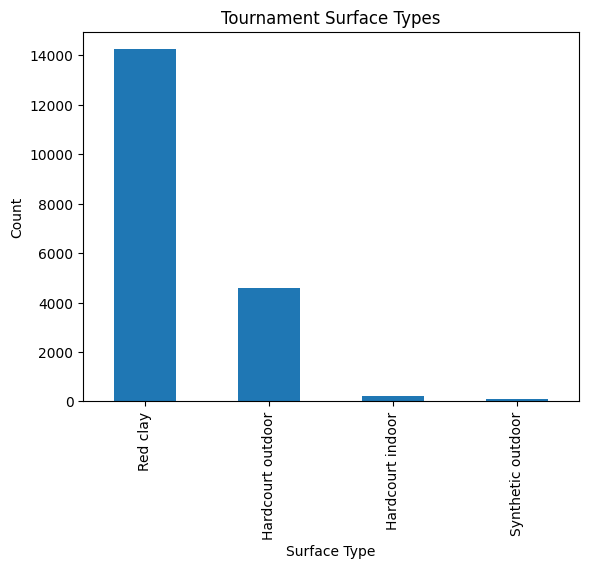

In [88]:
match_tournament=pd.read_csv('MatchTournamentInfo.csv')
match_tournament.drop_duplicates(inplace=True)
print(match_tournament['ground_type'].value_counts())
match_tournament['ground_type'].value_counts().plot(kind='bar')
plt.title('Tournament Surface Types')
plt.xlabel('Surface Type')
plt.ylabel('Count')
plt.show()

The most common type of surface used in the tournaments is 'Red clay' that used in '14237' tournaments

15. How many distinct countries are represented in the dataset?

In [ ]:
num_distinct_countries = combined_df['country'].nunique()

print(f"The dataset contains {num_distinct_countries} distinct countries.")

The dataset contains 95 distinct countries.


16. Which player has the highest winning percentage against top 10 ranked opponents?

In [93]:
country_current_rank=pd.concat([match_away_team_df[['name','current_rank']],match_home_team_df[['name','current_rank']]]).sort_values('current_rank').drop_duplicates().dropna().iloc[0:12,:]
top_10_players=country_current_rank['name'].unique()

In [99]:
game_info=pd.read_csv('GameInfo.csv')
point_count=game_info.iloc[:,[0,4,5]]
point_count.replace('A', pd.NA, inplace=True)
point_count['home_point'].fillna(0,inplace=True)
point_count['away_point'].fillna(0,inplace=True)
point_count['home_point'] = point_count['home_point'].astype(int)
point_count['away_point'] = point_count['away_point'].astype(int)

match_point_winner=point_count.groupby('match_id')[['home_point', 'away_point']].sum()
match_point_winner['winner_code'] = 0
match_point_winner.loc[match_point_winner['home_point'] > match_point_winner['away_point'], 'winner_code'] = 1
match_point_winner.loc[match_point_winner['home_point'] < match_point_winner['away_point'], 'winner_code'] = 2
match_winner=match_point_winner.iloc[:,[2]]

c:\USERS\ADMIN\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON37\lib\site-packages\pandas\core\frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
c:\USERS\ADMIN\APPDATA\LOCAL\PROGRAMS\PYTHON\PYTHON37\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\Admin\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

extra question no1.
 Is there a correlation between a player's experiance and their ranking?  

In [105]:
merged_df = pd.merge(match_home_team_df, match_away_team_df, on='match_id', how='inner', suffixes=('_player1', '_player2'))
merged_df=merged_df[['match_id','name_player1', 'name_player2']]
player_winner = pd.merge(merged_df,match_winner, on='match_id', how='inner')
player_winner.drop_duplicates(inplace=True)

player_winner['winner_name'] = player_winner.apply(lambda row: row['name_player1'] if row['winner_code'] == 1.0 else row['name_player2'], axis=1)
player_winner['loser_name'] = player_winner.apply(lambda row: row['name_player1'] if row['winner_code'] == 2.0 else row['name_player2'], axis=1)
player_winner_loser=player_winner.iloc[:,[0,4,5]]
player_winner_loser

,match_id,winner_name,loser_name
0,12260075,Lehečka J.,Nadal R.
1,12260076,Sinner J.,Khachanov K.
2,12260077,Alcaraz C.,Struff J.
3,12260078,Rublev A.,Alcaraz C.
7,12260080,Cerundolo F.,Zverev A.
...,...,...,...
24555,12384789,Léonard M.,Kostic T.
24556,12384806,Kasnikowski M.,Dutra da Silva D.
24557,12384892,Gomez F.,Chazal M.
24558,12384975,Șerban R.,Bandecchi S.


In [107]:

# Filter the dataframe to only include matches against top 10 players
top_10_matches =player_winner_loser[(player_winner_loser['loser_name'].isin(top_10_players))]
top_10_matches_winner=top_10_matches.iloc[:,[0,1]]

#  Count the number of wins for each winner
winner_counts = top_10_matches_winner['winner_name'].value_counts()
# Calculate the winning percentage for each winner
winner_percentages = (winner_counts / len(top_10_matches_winner)) * 100


# Find the player with the highest winning percentage
player_with_highest_win = winner_percentages.idxmax()
highest_win_pct = winner_percentages.max()

print(f"The player with the highest winning percentage against top 10 ranked opponents is {player_with_highest_win}  ,with {highest_win_pct} percent win")
winner_counts


The player with the highest winning percentage against top 10 ranked opponents is Świątek I.  ,with 13.636363636363635 percent win


Świątek I.       3
Rublev A.        1
Yastremska D.    1
Zidanšek T.      1
Volynets K.      1
Kalinina A.      1
Griekspoor T.    1
Fręch M.         1
Međedović H.     1
Badosa P.        1
Cîrstea S.       1
Cerundolo F.     1
Tabilo A.        1
Moutet C.        1
Draper J.        1
Vukić A.         1
Sabalenka A.     1
Lehečka J.       1
Putintseva Y.    1
Rus A.           1
Name: winner_name, dtype: int64

EXTRA QUESTION 1- Is there a correlation between a player's experience and their ranking?

In [114]:
match_home_team_turned_rank_df=match_home_team_df.iloc[:,[17,10,14]]
match_away_team_turned_rank_df=match_away_team_df.iloc[:,[17,10,14]]
turned_rank_player=pd.concat([match_home_team_turned_rank_df,match_away_team_turned_rank_df])
turned_rank_player.drop_duplicates()
turned_rank_player.dropna(inplace=True)
turned_rank_player['experience'] = 2024-turned_rank_player['turned_pro']
turned_rank_player.drop(columns='turned_pro', inplace=True)
turned_rank_player.drop_duplicates(inplace=True)
turned_rank_player.sort_values('current_rank')

,full_name,current_rank,experience
498,"Swiatek, Iga",1.0,8.0
4570,"Djokovic, Novak",1.0,21.0
8,"Sabalenka, Aryna",2.0,9.0
1,"Sinner, Jannik",2.0,6.0
2,"Alcaraz, Carlos",3.0,6.0
...,...,...,...
5879,"Gabashvili, Teimuraz",1272.0,23.0
4822,"Uzhylovsky, Vladimir",1341.0,19.0
42,"Clezar, Guilherme",1365.0,15.0
3447,"Gabashvili, Teimuraz",1452.0,23.0


In [115]:
experience_rank_correlation=turned_rank_player['experience'].corr(turned_rank_player['current_rank'])
if experience_rank_correlation <0.3:
    print('There is a weak correlation between players experience and there rank')
elif 0.3<experience_rank_correlation<0.5:
    print('There is a moderate correlation between players experience and there rank')
else:
    print('There is a strong correlation between players experience and there rank')

There is a weak correlation between players experience and there rank


EXTRA QUESTION 2- Is there a correlation between being right or left_hand and number of ranking?

In [120]:
handedness_ranking = df_players.groupby('plays')['current_rank'].mean()

print(f"Right-handed players have an average ranking of {handedness_ranking['right-handed']:.2f}.")
print(f"Left-handed players have an average ranking of {handedness_ranking['left-handed']:.2f}.")

Right-handed players have an average ranking of 365.35.
Left-handed players have an average ranking of 372.34.


The results shows that being a right-handed player leads to have a better rank.

extra question no3.
Which 3_players who received the most prize money in tennis tournaments? 


In [122]:
country_total_prize=pd.concat([match_away_team_df[['full_name','total_prize']],match_home_team_df[['full_name','total_prize']]]).drop_duplicates()
country_total_prize.groupby('full_name').sum().sort_values('total_prize',ascending=False).iloc[0:3,:]

,total_prize
full_name,
"Djokovic, Novak",455008686.0
"Nadal, Rafael",224653134.0
"Murray, Andy",107560350.0


17. What is the average number of breaks of serve per match? 
We use the dfPower dataframe(for PowerInfo table) previously read in question number 5.

In [125]:
total_breaks = dfPower['break_occurred'].sum()

num_matches = dfPower['match_id'].nunique()

average_breaks_per_match = total_breaks / num_matches
print(f"the average is: ",average_breaks_per_match )



the average is:  20.28867527786122


18- How does the average number of winners per match differ between hard and clay court surfaces?

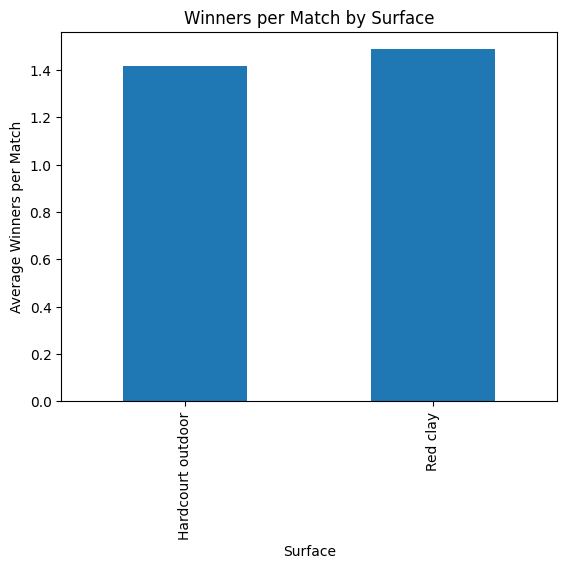

In [127]:
# Join the df_event and df_period DataFrames on 'match_id'
df_combined = pd.merge(dfEvent, match_tournament, on='match_id')

# Calculate the average winners per match for each surface
surface_winners = df_combined.groupby('ground_type')['winner_code'].mean()

# Plot the average winners per match for each surface
surface_winners.plot(kind='bar')
plt.xlabel('Surface')
plt.ylabel('Average Winners per Match')
plt.title('Winners per Match by Surface')
plt.show()


19- What is the number of winning matches for each player?

In [155]:
winner_counts = playerWinner['winner_name'].value_counts()
winner_counts





Melzer G.           118
Monteiro T.         118
Added D.            118
Bergs Z.            117
Arnaboldi F.        116
                   ... 
Sell K.               1
Ramos-Viñolas A.      1
Švajda Z.             1
Rybakina E.           1
Krueger M.            1
Name: winner_name, Length: 297, dtype: int64

For example Melzer G. won 118 times in matches.

In [ ]:
20- 